In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from sys import stdout
import matplotlib.pyplot as plt

**First let's load the dataset cleaned in "Scraping and cleaning" notebook**

In [3]:
df_app = pd.read_csv('data/final_dataset.csv', index_col=[0])
df_app.head(10)

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category,...,size,androidVersion,developer,developerId,containsAds,released,updated,version,comments,icon
0,/application/canva_graphic_design_video_invite...,1.0,"Canva: Graphic Design, Video, Invite & Logo Maker",2241579,50000000.0,4.68,4.7,8.8,Free,Art & Design,...,29M,4.1,Canva,Canva,False,"Nov 27, 2017",1.587087e+09,2.57.2,NaN,https://lh3.googleusercontent.com/homswqZDKEXx...
1,/application/ibis_paint_x/jp.ne.ibis.ibispaint...,2.0,ibis Paint X,642389,10000000.0,4.45,4.4,9.0,Free,Art & Design,...,56M,4.1,ibis inc.,ibis+inc.,True,"Feb 27, 2014",1.585644e+09,6.4.1,NaN,https://lh3.googleusercontent.com/QcfhlXm32JDn...
2,/application/kappboom_cool_wallpapers_backgrou...,3.0,Kappboom - Cool Wallpapers & Background Wallpa...,399327,10000000.0,4.63,0.0,0.0,Free,Art & Design,...,8.1M,4.1,Kappboom Inc.,Kappboom+Inc.,True,"May 24, 2010",1.514876e+09,1.8.3,NaN,https://lh3.googleusercontent.com/7aIuxwpjZ9_S...
3,/application/flipaclip_cartoon_animation/com.v...,4.0,FlipaClip: Cartoon animation,319841,10000000.0,4.28,1.5,3.2,Free,Art & Design,...,31M,4.1,Visual Blasters LLC,Visual+Blasters+LLC,True,"Apr 2, 2012",1.581218e+09,2.4.6,NaN,https://lh3.googleusercontent.com/v1LHbiVKdHFs...
4,/application/u_launcher_lite_new_3d_launcher_2...,5.0,"U Launcher Lite-New 3D Launcher 2019, Hide apps",216161,10000000.0,4.52,1.6,3.4,Free,Art & Design,...,15M,4.0.3,Moboapps Dev Team,Moboapps+Dev+Team,True,"Dec 12, 2017",1.586780e+09,2.2.24,NaN,https://lh3.googleusercontent.com/1-d8bEwvbj4c...
5,/application/medibang_paint_make_art_/com.medi...,6.0,MediBang Paint - Make Art !,194262,10000000.0,4.10,1.2,2.5,Free,Art & Design,...,25M,5.0,MediBang Inc.,5466859474658028637,True,"Jun 16, 2015",1.583984e+09,18.4,NaN,https://lh3.googleusercontent.com/gJiINYcgwxuy...
6,/application/u_launcher_3d_new_launcher_2019_3...,7.0,"U Launcher 3D: New Launcher 2019, 3d themes",130195,5000000.0,4.50,1.1,2.0,Free,Art & Design,...,13M,4.0.3,Moboapps Dev Team,Moboapps+Dev+Team,True,"Apr 11, 2017",1.586074e+09,2.8.4,NaN,https://lh3.googleusercontent.com/bgXCQ7c3ahr0...
7,/application/papercolor/com.eyewind.paperone,8.0,PaperColor,111058,10000000.0,4.23,1.9,4.2,Free,Art & Design,...,16M,4.0.3,Colorfit,Colorfit,False,"Jun 17, 2016",1.544193e+09,2.3.6,NaN,https://lh3.googleusercontent.com/zk1SVbWvnYrH...
8,/application/sand_draw_sketch_drawing_pad_crea...,9.0,Sand Draw Sketch Drawing Pad: Creative Doodle Art,99055,5000000.0,4.37,0.9,1.9,Free,Art & Design,...,39M,2.3,Kalrom Systems LTD,5101937198185715525,True,"Mar 21, 2013",1.557643e+09,3.4.3,NaN,https://lh3.googleusercontent.com/FEtDcu77tw3X...
9,/application/how_to_draw_graffitis/com.sweefit...,10.0,How to Draw Graffitis,94175,5000000.0,4.33,0.2,0.4,Free,Art & Design,...,9.2M,4.0,Sweefit Studios,8890723712967774017,True,"Feb 21, 2015",1.570780e+09,7.1.2,NaN,https://lh3.googleusercontent.com/Ax5kgE7e8TLP...


**Now let's see the repartion of the free and paid app on the Google Play Store**

In [4]:
df_app["Price"].value_counts().head(10)

Free     22627
$4.99       22
$0.99       19
$2.99       16
$1.99       14
$3.99        8
$6.99        5
$2.49        4
$9.99        4
$5.99        4
Name: Price, dtype: int64

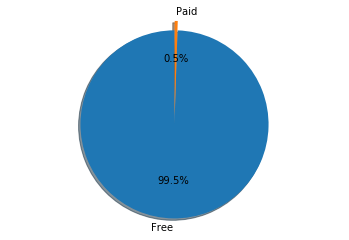

In [5]:
labels = 'Free', 'Paid'
explode = (0.1,0) #In order to highlights Free app

fig, ax = plt.subplots()
ax.pie([np.shape(df_app[df_app["Price"]=="Free"])[0], np.shape(df_app[df_app["Price"]!="Free"])[0]],
           explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**Now let's see this distribution over all the categories**

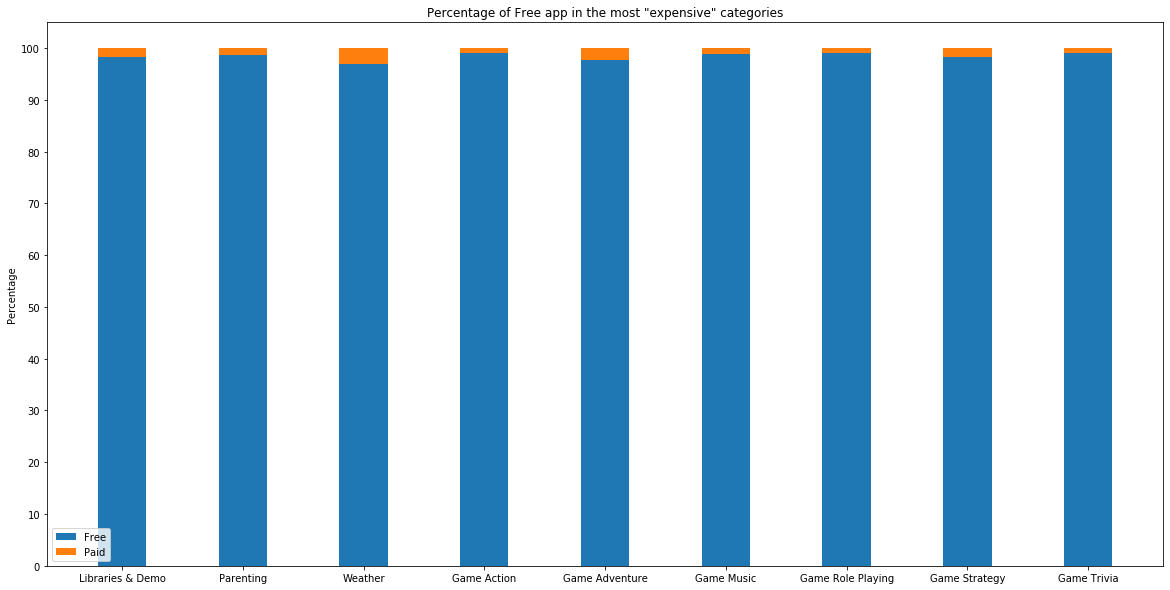

In [6]:
free = []
paid = []
label =[]
for category in df_app.Category.unique():
    free_cat = np.shape(df_app[(df_app["Price"]=="Free") & (df_app["Category"]== category)])[0]
    paid_cat = np.shape(df_app[(df_app["Price"]!="Free") & (df_app["Category"]== category)])[0]
    if((paid_cat/(free_cat+paid_cat))*100 >=1):
        label.append(category)
        free.append(free_cat/(free_cat+paid_cat)*100)
        paid.append((paid_cat/(free_cat+paid_cat))*100)
ind = np.arange(len(free))    
width = 0.4      
plt.figure(figsize=(20,10))
p1 = plt.bar(ind, free, width,)
p2 = plt.bar(ind, paid, width,
             bottom=free)

plt.ylabel("Percentage")
plt.title('Percentage of Free app in the most "expensive" categories')
plt.xticks(ind, label)
plt.yticks(np.arange(0, 101, 10))
plt.legend((p1[0], p2[0]), ('Free', 'Paid'))

plt.show()

In [7]:
df_app["Nb_Rating"].describe()

count    2.274600e+04
mean     2.003982e+05
std      1.634216e+06
min      1.000000e+02
25%      8.091000e+03
50%      3.220650e+04
75%      9.772125e+04
max      1.068849e+08
Name: Nb_Rating, dtype: float64

In [8]:
df_app["Installs"].describe()

count    2.274600e+04
mean     1.144295e+07
std      1.242483e+08
min      1.000000e+00
25%      1.000000e+06
50%      1.000000e+06
75%      5.000000e+06
max      5.000000e+09
Name: Installs, dtype: float64

In [9]:
df_app[df_app["Installs"]== df_app["Installs"].max()]

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category,...,size,androidVersion,developer,developerId,containsAds,released,updated,version,comments,icon
2936,/application/whatsapp_messenger/com.whatsapp,1.0,WhatsApp Messenger,106884902,5.000000e+09,4.29,1.8,3.4,Free,Communication,...,27M,4.0.3,WhatsApp Inc.,WhatsApp+Inc.,False,"Oct 18, 2010",1.586970e+09,2.20.123,NaN,https://lh3.googleusercontent.com/bYtqbOcTYOlg...
2939,/application/google_chrome_fast_secure/com.and...,4.0,Google Chrome: Fast & Secure,19578408,5.000000e+09,4.37,2.9,5.6,Free,Communication,...,Varies with device,Varies,Google LLC,5700313618786177705,False,"Feb 7, 2012",1.586974e+09,Varies with device,NaN,https://lh3.googleusercontent.com/KwUBNPbMTk9j...
2945,/application/gmail/com.google.android.gm,10.0,Gmail,6743557,5.000000e+09,4.40,1.7,2.9,Free,Communication,...,Varies with device,Varies,Google LLC,5700313618786177705,True,"Sep 21, 2010",1.587253e+09,Varies with device,NaN,https://lh3.googleusercontent.com/qTG9HMCp-s_a...
9141,/application/google_play_music/com.google.andr...,3.0,Google Play Music,4382860,5.000000e+09,4.10,1.1,1.9,Free,Music & Audio,...,Varies with device,Varies,Google LLC,5700313618786177705,True,"May 5, 2011",1.585677e+09,Varies with device,NaN,https://lh3.googleusercontent.com/HQm_x5ZH-Y61...
11595,/application/google_drive/com.google.android.a...,2.0,Google Drive,5081538,5.000000e+09,4.39,2.5,4.7,Free,Productivity,...,Varies with device,Varies,Google LLC,5700313618786177705,False,"Apr 27, 2011",1.586790e+09,Varies with device,NaN,https://lh3.googleusercontent.com/1pw-tHjrkmMg...
12585,/application/facebook/com.facebook.katana,1.0,Facebook,96409662,5.000000e+09,4.24,0.9,1.9,Free,Social,...,Varies with device,Varies,Facebook,Facebook,True,NaN,1.587188e+09,Varies with device,NaN,https://lh3.googleusercontent.com/ccWDU4A7fX1R...
13562,/application/google_play_services/com.google.a...,1.0,Google Play services,28257988,5.000000e+09,4.26,1.6,3.5,Free,Tools,...,Varies with device,Varies,Google LLC,5700313618786177705,False,"May 24, 2012",1.587309e+09,Varies with device,NaN,https://lh3.googleusercontent.com/f6ZSUJrtL5un...
13564,/application/google/com.google.android.googleq...,3.0,Google,13997467,5.000000e+09,4.41,2.1,3.9,Free,Tools,...,Varies with device,Varies,Google LLC,5700313618786177705,True,"Aug 12, 2010",1.587136e+09,Varies with device,NaN,https://lh3.googleusercontent.com/DKoidc0T3T1K...
13583,/application/android_accessibility_suite/com.g...,22.0,Android Accessibility Suite,1830589,5.000000e+09,4.36,2.2,3.4,Free,Tools,...,Varies with device,Varies,Google LLC,5700313618786177705,False,NaN,1.586882e+09,Varies with device,NaN,https://lh3.googleusercontent.com/xBFTJQCPqUh0...
13586,/application/google_text_to_speech/com.google....,25.0,Google Text-to-Speech,1661524,5.000000e+09,4.35,2.3,3.5,Free,Tools,...,Varies with device,Varies,Google LLC,5700313618786177705,False,"Oct 10, 2013",1.587021e+09,Varies with device,NaN,https://lh3.googleusercontent.com/NqWvryDAnkEW...


In [10]:
df_app.sort_values(["Nb_Rating", "Installs"], ascending = False).head(10)

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category,...,size,androidVersion,developer,developerId,containsAds,released,updated,version,comments,icon
2936,/application/whatsapp_messenger/com.whatsapp,1.0,WhatsApp Messenger,106884902,5.000000e+09,4.29,1.8,3.4,Free,Communication,...,27M,4.0.3,WhatsApp Inc.,WhatsApp+Inc.,False,"Oct 18, 2010",1.586970e+09,2.20.123,NaN,https://lh3.googleusercontent.com/bYtqbOcTYOlg...
12585,/application/facebook/com.facebook.katana,1.0,Facebook,96409662,5.000000e+09,4.24,0.9,1.9,Free,Social,...,Varies with device,Varies,Facebook,Facebook,True,NaN,1.587188e+09,Varies with device,NaN,https://lh3.googleusercontent.com/ccWDU4A7fX1R...
12586,/application/instagram/com.instagram.android,2.0,Instagram,95806924,1.000000e+09,4.46,1.4,2.8,Free,Social,...,Varies with device,Varies,Instagram,Instagram,True,"Apr 3, 2012",1.586836e+09,Varies with device,NaN,https://lh3.googleusercontent.com/2sREY-8Upjma...
2937,/application/messenger_text_and_video_chat_for...,2.0,Messenger – Text and Video Chat for Free,71185969,1.000000e+09,4.24,0.5,1.1,Free,Communication,...,Varies with device,Varies,Facebook,Facebook,False,"Jan 30, 2014",1.586925e+09,Varies with device,NaN,https://lh3.googleusercontent.com/rkBi-WHAI-dz...
14543,/application/youtube/com.google.android.youtube,1.0,YouTube,67255190,5.000000e+09,4.14,2.2,4.0,Free,Video Players,...,Varies with device,Varies,Google LLC,5700313618786177705,True,"Oct 20, 2010",1.587170e+09,Varies with device,NaN,https://lh3.googleusercontent.com/lMoItBgdPPVD...
21281,/application/clash_of_clans/com.supercell.clas...,1.0,Clash of Clans,51568217,5.000000e+08,4.51,0.3,0.7,Free,Game Strategy,...,143M,4.1,Supercell,6715068722362591614,False,"Sep 30, 2013",1.586947e+09,13.180.13,NaN,https://lh3.googleusercontent.com/akv2Bdp7i5Vv...
15511,/application/garena_free_fire_kalahari/com.dts...,1.0,Garena Free Fire: Kalahari,43395207,5.000000e+08,4.36,5.5,8.4,Free,Game Action,...,41M,4.0.3,GARENA INTERNATIONAL I PRIVATE LIMITED,GARENA+INTERNATIONAL+I+PRIVATE+LIMITED,False,"Dec 7, 2017",1.585912e+09,1.47.0,NaN,https://lh3.googleusercontent.com/LJxdq84-4j_f...
16497,/application/subway_surfers/com.kiloo.subwaysurf,1.0,Subway Surfers,32200740,1.000000e+09,4.47,0.6,1.3,Free,Game Arcade,...,94M,4.1,SYBO Games,7363891306616760846,True,"Sep 20, 2012",1.587028e+09,1.118.0,NaN,https://lh3.googleusercontent.com/qW2OiztjJl0V...
13562,/application/google_play_services/com.google.a...,1.0,Google Play services,28257988,5.000000e+09,4.26,1.6,3.5,Free,Tools,...,Varies with device,Varies,Google LLC,5700313618786177705,False,"May 24, 2012",1.587309e+09,Varies with device,NaN,https://lh3.googleusercontent.com/f6ZSUJrtL5un...
21282,/application/clash_royale/com.supercell.clashr...,2.0,Clash Royale,28254261,1.000000e+08,4.26,0.5,1.0,Free,Game Strategy,...,106M,4.1,Supercell,6715068722362591614,False,"Mar 1, 2016",1.574956e+09,3.2.1,NaN,https://lh3.googleusercontent.com/K-MNjDiO2WwR...


In [11]:
df_app["Ev_30_norm"] = df_app["Ev_30"]*df_app["Nb_Rating"]
df_app["Ev_60_norm"] = df_app["Ev_60"]*df_app["Nb_Rating"]

In [12]:
df_app.Category.unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Maps & Navigation', 'Medical', 'Music & Audio',
       'News & Magazines', 'Parenting', 'Personalization', 'Photography',
       'Productivity', 'Shopping', 'Social', 'Sports', 'Tools',
       'Travel & Local', 'Video Players', 'Weather', 'Game Action',
       'Game Adventure', 'Game Arcade', 'Game Board', 'Game Casino',
       'Game Casual', 'Game Educational', 'Game Music', 'Game Puzzle',
       'Game Racing', 'Game Role Playing', 'Game Simulation',
       'Game Sports', 'Game Strategy', 'Game Trivia', 'Game Word'],
      dtype=object)

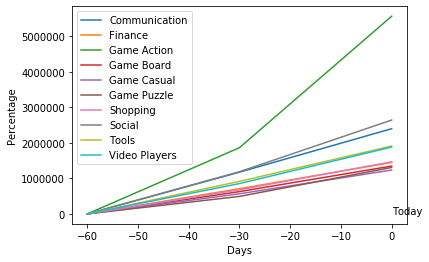

In [13]:
grouped = df_app.groupby("Category")["Ev_30_norm","Ev_60_norm"].mean()

for index in grouped[grouped["Ev_60_norm"] > 1200000].index:
    x = [-60,-30,0]
    y = [0,grouped.loc[index,"Ev_30_norm"],grouped.loc[index,"Ev_60_norm"]]
    plt.plot(x, y, label = index)
plt.annotate("Today",(0,0))
plt.xlabel('Days')
plt.ylabel('Percentage')
plt.legend()
plt.show()

# Ranking
**In this section we will try to made a simple but reliable score to make global ranking**

In [14]:
df_app["Score"] = (df_app["Installs"]+df_app["Nb_Rating"])*df_app["Avg_Rating"]

In [15]:
df_app["Global_rank"] = df_app["Score"].rank(ascending = False)

In [16]:
df_app.sort_values(["Global_rank"]).head(20)

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category,...,containsAds,released,updated,version,comments,icon,Ev_30_norm,Ev_60_norm,Score,Global_rank
13564,/application/google/com.google.android.googleq...,3.0,Google,13997467,5.000000e+09,4.41,2.1,3.9,Free,Tools,...,True,"Aug 12, 2010",1.587136e+09,Varies with device,NaN,https://lh3.googleusercontent.com/DKoidc0T3T1K...,29394680.7,54590121.3,2.211173e+10,1.0
2945,/application/gmail/com.google.android.gm,10.0,Gmail,6743557,5.000000e+09,4.40,1.7,2.9,Free,Communication,...,True,"Sep 21, 2010",1.587253e+09,Varies with device,NaN,https://lh3.googleusercontent.com/qTG9HMCp-s_a...,11464046.9,19556315.3,2.202967e+10,2.0
11595,/application/google_drive/com.google.android.a...,2.0,Google Drive,5081538,5.000000e+09,4.39,2.5,4.7,Free,Productivity,...,False,"Apr 27, 2011",1.586790e+09,Varies with device,NaN,https://lh3.googleusercontent.com/1pw-tHjrkmMg...,12703845.0,23883228.6,2.197231e+10,3.0
2939,/application/google_chrome_fast_secure/com.and...,4.0,Google Chrome: Fast & Secure,19578408,5.000000e+09,4.37,2.9,5.6,Free,Communication,...,False,"Feb 7, 2012",1.586974e+09,Varies with device,NaN,https://lh3.googleusercontent.com/KwUBNPbMTk9j...,56777383.2,109639084.8,2.193556e+10,4.0
2936,/application/whatsapp_messenger/com.whatsapp,1.0,WhatsApp Messenger,106884902,5.000000e+09,4.29,1.8,3.4,Free,Communication,...,False,"Oct 18, 2010",1.586970e+09,2.20.123,NaN,https://lh3.googleusercontent.com/bYtqbOcTYOlg...,192392823.6,363408666.8,2.190854e+10,5.0
13583,/application/android_accessibility_suite/com.g...,22.0,Android Accessibility Suite,1830589,5.000000e+09,4.36,2.2,3.4,Free,Tools,...,False,NaN,1.586882e+09,Varies with device,NaN,https://lh3.googleusercontent.com/xBFTJQCPqUh0...,4027295.8,6224002.6,2.180798e+10,6.0
13586,/application/google_text_to_speech/com.google....,25.0,Google Text-to-Speech,1661524,5.000000e+09,4.35,2.3,3.5,Free,Tools,...,False,"Oct 10, 2013",1.587021e+09,Varies with device,NaN,https://lh3.googleusercontent.com/NqWvryDAnkEW...,3821505.2,5815334.0,2.175723e+10,7.0
14050,/application/maps_navigate_explore/com.google....,1.0,Maps - Navigate & Explore,11175295,5.000000e+09,4.33,1.1,1.9,Free,Travel & Local,...,True,NaN,1.586968e+09,Varies with device,NaN,https://lh3.googleusercontent.com/Kf8WTct65hFJ...,12292824.5,21233060.5,2.169839e+10,8.0
12585,/application/facebook/com.facebook.katana,1.0,Facebook,96409662,5.000000e+09,4.24,0.9,1.9,Free,Social,...,True,NaN,1.587188e+09,Varies with device,NaN,https://lh3.googleusercontent.com/ccWDU4A7fX1R...,86768695.8,183178357.8,2.160878e+10,9.0
13562,/application/google_play_services/com.google.a...,1.0,Google Play services,28257988,5.000000e+09,4.26,1.6,3.5,Free,Tools,...,False,"May 24, 2012",1.587309e+09,Varies with device,NaN,https://lh3.googleusercontent.com/f6ZSUJrtL5un...,45212780.8,98902958.0,2.142038e+10,10.0


**Thanks to an API on the same website we can also get more detailled information but it is limited to 100 requests per hour**

**These cells will be explored later to get more information for the best ranked app in the overall ranking**

In [16]:
def call_api(url):
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception('API response: {}'.format(response.status_code))
    return response

In [17]:
#################### HERE we will need to define which app need more information
website = "https://www.androidrank.org/api/application/"
key = "60lnc52x178li1rocmpum3829kdf6d9wt3dp7lqg7vxmqat6ov9ekcoipmqyuzpa"

for url in df_app.sort_values(["Global_rank"])["URL"].head(500):
    codename = url.split('/')[-1]
    search = website+codename+"?key="+key;
    response = call_api(search)
    bigjson.append(response.json())

NameError: name 'bigjson' is not defined

In [19]:
len(bigjson)

500

In [ ]:
# Now we have more detailled informations about the top 500 apps
import json
with open('data/bigjson.txt', 'w') as outfile:
    json.dump(bigjson, outfile)

In [ ]:
################## Exemple on how to navigate in the big dictionnary
test = list(filter(lambda person: person['category'] == 'Communication', bigjson))

**Let's scrape the 500 most relevant comment for the 500 top apps**

In [106]:
from google_play_scraper import Sort, reviews
i = 483
tot_page = 500
for url in df_app.sort_values(["Global_rank"])["URL"].head(500)[i:]:
    continuation_token = None
    i += 1
    printed= i/tot_page*100
    stdout.write("\r%f %%" % printed)
    stdout.flush()
    codename = url.split('/')[-1]
    resultfinal = []
    for j in range(5):
        result, continuation_token = reviews(
            codename,
            lang='en', # defaults to 'en'
            country='us', # defaults to 'us'
            sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
            count=100, # defaults to 100
            continuation_token=continuation_token
        )
        resultfinal = resultfinal + result
    df_app.at[df_app.index[df_app["URL"]==url].tolist()[0],"comments"] = resultfinal

100.000000 %

In [107]:
df_app.to_csv("data/final_dataset.csv")

In [109]:
df_app.columns

Index(['URL', 'Rank', 'Name', 'Nb_Rating', 'Installs', 'Avg_Rating', 'Ev_30',
       'Ev_60', 'Price', 'Category', 'Parsable', 'histogram', 'size',
       'androidVersion', 'developer', 'developerId', 'containsAds', 'released',
       'updated', 'version', 'comments', 'icon', 'Ev_30_norm', 'Ev_60_norm',
       'Score', 'Global_rank'],
      dtype='object')

**DEVELOPERS**

In [128]:
df_app.groupby("developer").mean().sort_values("Parsable", ascending = False)

,Rank,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Parsable,containsAds,updated,Ev_30_norm,Ev_60_norm,Score,Global_rank
developer,,,,,,,,,,,,,
#1 App to Earn money Online without Investment,131.000000,4.911700e+04,5.000000e+06,4.480000,4.200000,11.300000,1.0,0.0,1.586428e+09,2.062914e+05,5.550221e+05,2.262004e+07,6506.000000
Rometic,379.000000,6.820000e+02,1.000000e+05,3.880000,7.800000,22.300000,1.0,0.0,1.585621e+09,5.319600e+03,1.520860e+04,3.906462e+05,21168.000000
Roger Media Inc,431.000000,1.621100e+04,1.000000e+06,4.030000,0.100000,0.100000,1.0,1.0,1.540894e+09,1.621100e+03,1.621100e+03,4.095330e+06,15256.000000
Rogers Digital Media,377.000000,6.706000e+03,5.000000e+05,2.560000,1.000000,2.000000,1.0,1.0,1.584023e+09,6.706000e+03,1.341200e+04,1.297167e+06,19496.000000
Rogue Rocket Games LLC,439.000000,5.566000e+03,1.000000e+06,4.630000,0.000000,0.000000,1.0,1.0,1.573879e+09,0.000000e+00,0.000000e+00,4.655771e+06,11822.000000
Roja Directa Futbol,492.000000,1.240000e+03,1.000000e+06,1.890000,7.800000,12.100000,1.0,1.0,1.466630e+09,9.672000e+03,1.500400e+04,1.892344e+06,19063.000000
Roku Inc.,72.000000,3.807950e+05,1.000000e+07,4.520000,2.200000,4.800000,1.0,1.0,1.587056e+09,8.377490e+05,1.827816e+06,4.692119e+07,1793.000000
Rola Tech,499.000000,7.390000e+02,1.000000e+06,4.320000,0.100000,0.200000,1.0,1.0,1.564676e+09,7.390000e+01,1.478000e+02,4.323192e+06,14109.000000
Rollic Games,486.000000,2.395100e+04,1.000000e+07,3.490000,32.400000,111.700000,1.0,1.0,1.585726e+09,7.760124e+05,2.675327e+06,3.498359e+07,5341.000000


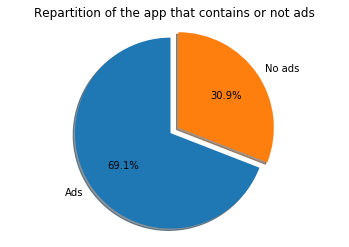

In [50]:
labels = 'Ads', 'No ads'
explode = (0.1,0) #In order to highlights Free app

fig, ax = plt.subplots()
ax.pie([np.shape(df_app[df_app["containsAds"]==True])[0], np.shape(df_app[df_app["containsAds"]==False])[0]],
           explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Repartition of the app that contains or not ads")
plt.show()

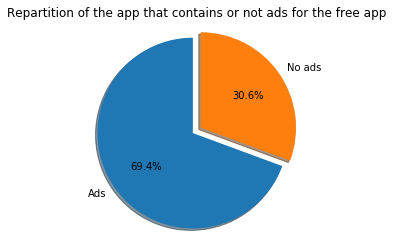

In [56]:
labels = 'Ads', 'No ads'
explode = (0.1,0) #In order to highlights Free app

fig, ax = plt.subplots()
ax.pie([np.shape(df_app[(df_app["containsAds"]==True) & (df_app["Price"]=="Free")])[0], np.shape(df_app[(df_app["containsAds"]==False) & (df_app["Price"]=="Free")])[0]],
           explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Repartition of the app that contains or not ads for the free app")
plt.show()

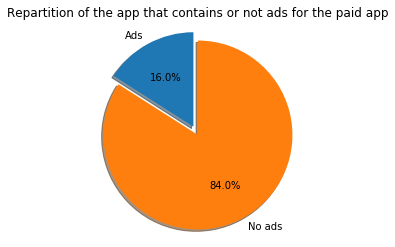

In [57]:
labels = 'Ads', 'No ads'
explode = (0.1,0) #In order to highlights Free app

fig, ax = plt.subplots()
ax.pie([np.shape(df_app[(df_app["containsAds"]==True) & (df_app["Price"]!="Free")])[0], np.shape(df_app[(df_app["containsAds"]==False) & (df_app["Price"]!="Free")])[0]],
           explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Repartition of the app that contains or not ads for the paid app")
plt.show()

**We still have 16% of paid app that have ads**

In [100]:
df_app.loc[df_app["URL"]=="/application/telcel/com.telcel.contenedor"]

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category,...,containsAds,released,updated,version,comments,icon,Ev_30_norm,Ev_60_norm,Score,Global_rank
4798,/application/telcel/com.telcel.contenedor,402.0,Telcel,33956,100000000.0,3.37,2.1,3.4,Free,Entertainment,...,True,NaN,1.586409e+09,13.2.0,[],https://lh3.googleusercontent.com/wMO-rS1oRRz6...,71307.6,115450.4,3.371144e+08,479.0


In [71]:
df_app_500 = df_app.sort_values(["Global_rank"]).head(500).copy()
df_app_500.reset_index(inplace=True, drop = True)

In [68]:
# Text handling utilities
from string import punctuation
stopwords_list = open('data/stopwords.txt', 'r').readlines()
stopwords_list = [x.strip() for x in stopwords_list]
def stopword_remover(text):
    text_list = text.split()
    text_list = [x for x in text_list if x not in stopwords_list]
    return ' '.join(text_list)
def lowercase_all(text):
    return text.lower()
def remove_punct(text):
    return ''.join([ch for ch in text if ch not in punctuation])

[{'userName': 'Akshay Singh Jamwal',
  'userImage': 'https://lh3.googleusercontent.com/a-/AOh14Gh1_PdsFWB_8anJDmz5G9Rt4NwB7NBeq7aRGag5vAo',
  'content': "This app still has no way of natively adding numbered lists or bullet points. If you want that, you have to go to a text editor, copy, and then come back to the app. Honestly, it's ridiculous not to have basic formatting features. It's like using Notepad in 1995. Formatting features are limited to changing text colour, and a few font options. Get with the program, people. It's 2020.",
  'score': 2,
  'thumbsUpCount': 260,
  'reviewCreatedVersion': '2020.03.15.302138189.release',
  'at': datetime.datetime(2020, 4, 14, 13, 16, 16),
  'replyContent': None,
  'repliedAt': None},
 {'userName': 'Jennifer Scull',
  'userImage': 'https://lh3.googleusercontent.com/a-/AOh14Gjuk_Ry2LrKPP2dg1T9I91jRgsr5RqAl3F8_qWUHg',
  'content': "For the past few months, I have to uninstall and then reinstall the Gmail app every two or three days. It stops sync

In [70]:
# Clean the comments
df_app_500['comments clean'] = df_app_500['comment'].apply(remove_punct).apply(stopword_remover).apply(lowercase_all)

NameError: name 'dblp' is not defined

In [125]:
df_app_500["developer"].value_counts()

Google LLC                                  57
Samsung Electronics Co.,  Ltd.              23
Outfit7 Limited                             14
Motorola Mobility LLC.                      10
Microsoft Corporation                        8
ELECTRONIC ARTS                              7
King                                         7
Huawei Internet Services                     6
Xiaomi Inc.                                  5
Miniclip.com                                 5
Best Free Video Editor & Video Maker Dev     5
Sony Mobile Communications                   5
Rovio Entertainment Corporation              5
Amazon Mobile LLC                            5
Supercell                                    5
Facebook                                     5
VOODOO                                       4
Gameloft SE                                  4
Instagram                                    3
Good Job Games                               3
Airtel                                       3
Samsung R&D I